# Geographic Visualizations with Python and Cartopy
Geospatial analysis is a powerful tool that allows us to understand patterns and trends related to geographical locations. With the increasing availability of geolocated data, mapping and visualization have become crucial skills for data scientists. In this sessioni, we're going to learn how to create maps and geographic visualizations in Python using the Cartopy library as well as using lets-plot.

We will start by plotting simple maps and gradually add complexity to them. You will learn how to:

- Create a simple map and plot a single point on it.
- Add context to the map by incorporating geographical features like land, ocean, and coastlines.
- Add multiple points to a map and label them.
- Use a more detailed map using tiles from Stamen Terrain.
- Create a choropleth map, which displays divided geographic areas that are colored in relation to a data variable.

Let's dive into geographic visualizations!






## Step 1: Importing Required Libraries

Let's start by importing the libraries we need for this task.

In [2]:
!pip install lets_plot
!pip install cartopy

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from lets_plot import *


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 45.5 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 63.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 30.7 MB/s eta 0:00:00:00:01


## Step 2: Plotting a Simple Map

Here is how to plot a simple map with a single point.



### Cartopy

/home/codespace/.python/current/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


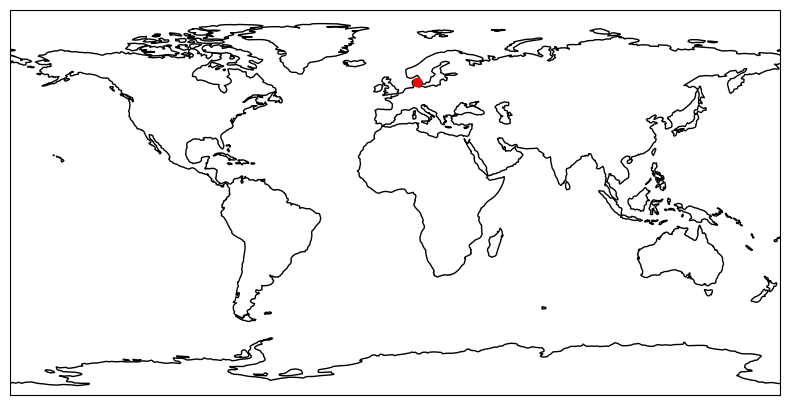

In [3]:
# Create a new figure, and a GeoAxes with PlateCarree projection
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set global extent
ax.set_global()

# Add coastlines
ax.coastlines()

# Define the coordinates
x, y = 10.2039, 56.1629  # Aarhus

# Plot a red dot at the coordinates
ax.plot(x, y, 'ro')

plt.show();

### Lets-Plot

In [6]:
!pip install geopandas


from lets_plot.geo_data import *


LetsPlot.setup_html()

# Define the coordinates
data = {'lon': [10.2039], 'lat': [56.1629]}

# Create the plot
plot = ggplot() + \
       geom_livemap() + \
       geom_point(aes(x='lon', y='lat'), data=data, color='red', size=4)

plot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 7.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 41.0 MB/s eta 0:00:00:00:0100:01
The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).


### Step 3: Adding Context to the Map (Cartopy only)

We can add features such as land, ocean, and coastlines to provide context.



/home/codespace/.python/current/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/codespace/.python/current/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


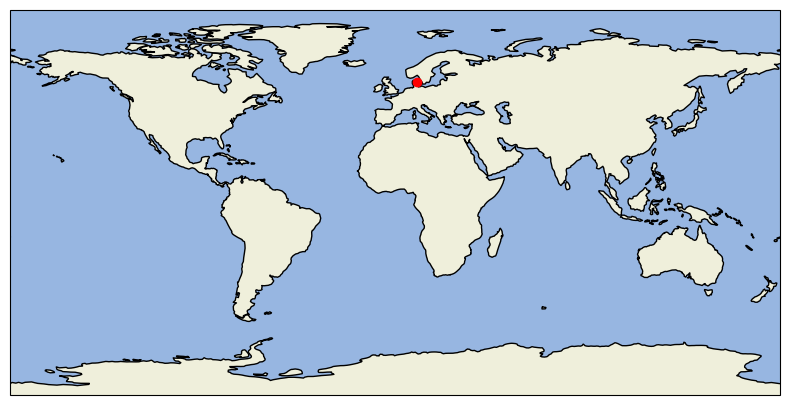

In [7]:
import cartopy.feature as cfeature

fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# Add features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)

ax.plot(x, y, 'ro')

plt.show();

## Step 4: Adding Multiple Points

Let's add multiple points to our map.

### Cartopy

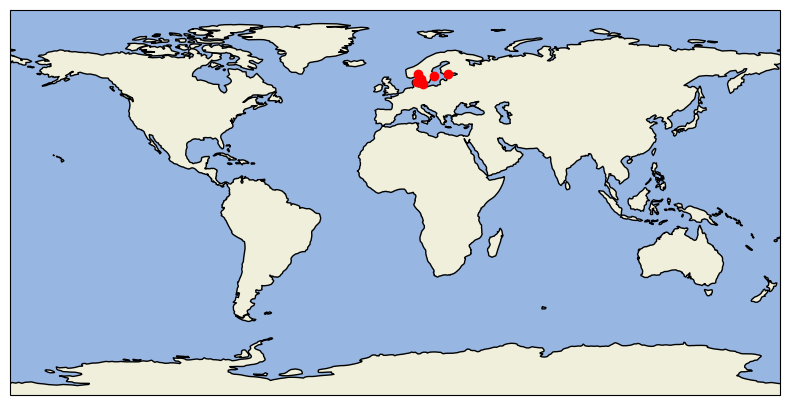

In [8]:
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)

# Define multiple coordinates
coords = {
    "Stockholm": (18.0686, 59.3293 ),
    "Gothenburg": (11.9746, 57.7089),
    "Oslo": (10.7522, 59.9139),
    "Copenhagen": (12.5683, 55.6761),
    "Helsinki": (24.9342, 60.1756),
    "Malmö": (13.0038, 55.6050),
    "Aarhus": (10.2039, 56.1629),
}

# Plot a red dot for each coordinate
for city, coord in coords.items():
    ax.plot(*coord, 'ro')

plt.show()


### Lets-Plot

In [9]:
data = {'lon': [coord[0] for coord in coords.values()],
        'lat': [coord[1] for coord in coords.values()],
        'city': list(coords.keys())}

plot = ggplot() + \
       geom_livemap() + \
       geom_point(aes(x='lon', y='lat'), data=data, color='red', size=4) + \
       geom_text(aes(x='lon', y='lat', label='city'), data=data, nudge_y=0.5)

plot

## Step 5: Zooming in on the Selected Cities (only Cartopy)
To get a closer look at the cities, we can adjust the extent of the map to only include the area of interest. The set_extent method allows us to do this, which takes a list of values that represent [Longitude West, Longitude East, Latitude South, Latitude North].

First, we need to find the minimal and maximal coordinates from our dictionary of cities:



In [10]:
min_long = min(city[0] for city in coords.values()) - 5 # additional 5 degree for padding
max_long = max(city[0] for city in coords.values()) + 5
min_lat = min(city[1] for city in coords.values()) - 5
max_lat = max(city[1] for city in coords.values()) + 5


Now, we can set the extent of the map:



/home/codespace/.python/current/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


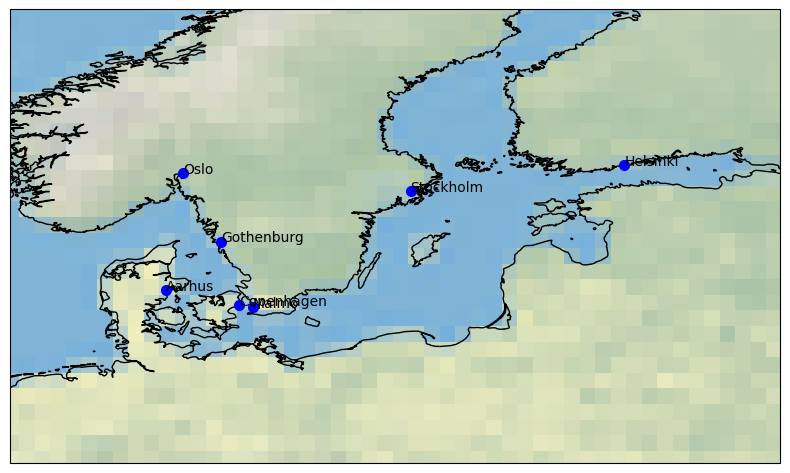

In [11]:
longitude_extent = max_long - min_long
latitude_extent = max_lat - min_lat
figsize = (10, 10 * (latitude_extent / longitude_extent))
fig = plt.figure(figsize=figsize)

m = plt.axes(projection=ccrs.PlateCarree())
m.set_extent([min_long, max_long, min_lat, max_lat], crs=ccrs.PlateCarree())
m.stock_img()
m.coastlines()

# add the cities
for city, coord in coords.items():
    plt.plot(coord[0], coord[1], 'bo', markersize=7, transform=ccrs.PlateCarree())
    plt.text(coord[0], coord[1], city, transform=ccrs.PlateCarree())


plt.show()


## Step 6: Using a Detailed Map

Finally, we can use a detailed map by loading a tileset.



### Cartopy

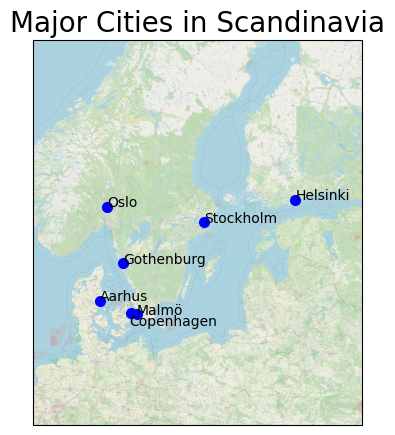

In [12]:
import cartopy.io.img_tiles as cimgt

# Create a OSM Terrain instance
terrainTiles = cimgt.OSM()

fig = plt.figure(figsize=(10, 5))

# Create a GeoAxes in the tile's projection
ax = fig.add_subplot(1, 1, 1, projection=terrainTiles.crs)

# Limit the extent of the map to a small longitude/latitude range
ax.set_extent([min_long, max_long, min_lat, max_lat], crs=ccrs.Geodetic())

# Add the Stamen data at zoom level 8
ax.add_image(terrainTiles, 8)

# Plotting the cities using the selected cities and their coordinates.
for city, coord in coords.items():
    plt.plot(coord[0], coord[1], 'bo', markersize=7, transform=ccrs.PlateCarree())
    if city == "Copenhagen":
      plt.text(coord[0]*0.99, coord[1]*0.99, city, transform=ccrs.PlateCarree())
    else:
      plt.text(coord[0], coord[1], city, transform=ccrs.PlateCarree())


plt.title("Major Cities in Scandinavia", fontsize=20)
plt.show()

### Lets-Plot

In [37]:
from lets_plot import tilesets

plot = ggplot() + \
       geom_livemap(tiles=tilesets.OSM) + \
       geom_point(aes(x='lon', y='lat'), data=data, color='blue', size=8) + ggtitle("Major Cities in Scandinavia")
       #geom_text(aes(x='lon', y='lat', label='city'), data=data, nudge_y=0.5, color = 'black')
plot

## Choropleth Maps

Cartopy can be used to create choropleth maps as well, although this may require some additional steps and use of geopandas for handling GeoDataFrame.



In [13]:
from urllib.request import urlopen
import json
import pandas as pd

# Load geojson data for counties
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

# Load unemployment data
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv", dtype={"fips": str})

df

,fips,unemp
0,01001,5.3
1,01003,5.4
2,01005,8.6
3,01007,6.6
4,01009,5.5
...,...,...
3214,72145,13.9
3215,72147,10.6
3216,72149,20.2
3217,72151,16.9


In [15]:
gdf = gpd.GeoDataFrame.from_features(counties["features"])
gdf['id'] = gdf['GEO_ID'].apply(lambda x: x[-5:])
gdf = gdf.merge(df, left_on='id', right_on='fips')
gdf

,geometry,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,id,fips,unemp
0,"POLYGON ((-86.49677 32.34444, -86.7179 32.4028...",0500000US01001,01,001,Autauga,County,594.436,01001,01001,5.3
1,"POLYGON ((-86.5778 33.76532, -86.75914 33.8406...",0500000US01009,01,009,Blount,County,644.776,01009,01009,5.5
2,"POLYGON ((-85.18413 32.87052, -85.12342 32.772...",0500000US01017,01,017,Chambers,County,596.531,01017,01017,5.5
3,"POLYGON ((-86.51734 33.02057, -86.51596 32.929...",0500000US01021,01,021,Chilton,County,692.854,01021,01021,5.6
4,"POLYGON ((-88.13999 34.5817, -88.13925 34.5878...",0500000US01033,01,033,Colbert,County,592.619,01033,01033,7.0
...,...,...,...,...,...,...,...,...,...,...
3212,"MULTIPOLYGON (((-75.24227 38.02721, -75.29687 ...",0500000US51001,51,001,Accomack,County,449.496,51001,51001,4.8
3213,"POLYGON ((-81.2251 37.23487, -81.20477 37.2430...",0500000US51021,51,021,Bland,County,357.725,51021,51021,5.2
3214,"POLYGON ((-81.9683 37.5378, -81.92787 37.51212...",0500000US51027,51,027,Buchanan,County,502.763,51027,51027,10.8
3215,"POLYGON ((-78.44332 37.0794, -78.49303 36.8912...",0500000US51037,51,037,Charlotte,County,475.271,51037,51037,5.0


### Cartopy

Please note, this is a basic example, the power of choropleth maps is in displaying a color-coded representation of a third variable (like population density or unemployment rates) which might be an interesting topic to explore in future.

/home/codespace/.python/current/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/codespace/.python/current/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


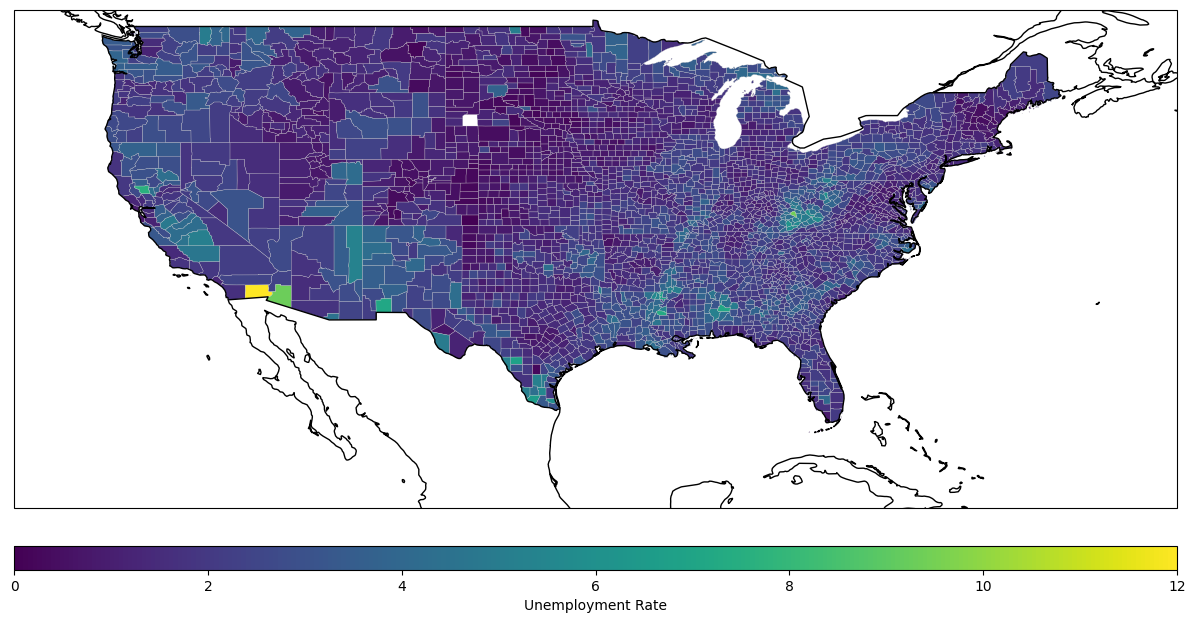

In [16]:
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Ensure geometries are valid
gdf = gdf[gdf.geometry.notnull()]

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

gdf.plot(column='unemp', cmap='viridis', linewidth=0.2, ax=ax, edgecolor='0.8')

# Add features
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)

# Set the extent to cover the continental USA
ax.set_extent([-130, -60, 20, 50], ccrs.PlateCarree())

# Add a color bar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=12))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.05, aspect=50)
cbar.set_label('Unemployment Rate')

plt.show()



### Lets-Plot

In [17]:
# Setup Lets-Plot for HTML output
LetsPlot.setup_html()

ggplot() + geom_livemap() + \
geom_map(aes(fill='unemp'),
         color=None,
         data=gdf,
         scale_linewidth=0, size=0.1,
         alpha=.5, tooltips=layer_tooltips().line("@NAME").line("Unemployment Rate|^fill")) 


In [2]:
!pip freeze > requirements.txt

In [3]:
!code --list-extensions

Loading "original-fs" failed
Error: Cannot find module 'original-fs'
Require stack:
- /vscode/bin/linux-x64/50560b991207e2bb70a6e177f2c2e88949a01e6c-insider/out/server-cli.js
    at Module._resolveFilename (node:internal/modules/cjs/loader:1145:15)
    at Module._load (node:internal/modules/cjs/loader:986:27)
    at Module.require (node:internal/modules/cjs/loader:1233:19)
    at require (node:internal/modules/helpers:179:18)
    at i (/vscode/bin/linux-x64/50560b991207e2bb70a6e177f2c2e88949a01e6c-insider/out/server-cli.js:3:98)
    at r.load (/vscode/bin/linux-x64/50560b991207e2bb70a6e177f2c2e88949a01e6c-insider/out/server-cli.js:2:1637)
    at h.load (/vscode/bin/linux-x64/50560b991207e2bb70a6e177f2c2e88949a01e6c-insider/out/server-cli.js:1:13977)
    at u (/vscode/bin/linux-x64/50560b991207e2bb70a6e177f2c2e88949a01e6c-insider/out/server-cli.js:3:9338)
    at Object.errorback (/vscode/bin/linux-x64/50560b991207e2bb70a6e177f2c2e88949a01e6c-insider/out/server-cli.js:3:9457)
    at h.tr